In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import random
import plotly.figure_factory as ff
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm

In [22]:
df_bruto = pd.read_excel('https://github.com/adonisdario/data-science/raw/refs/heads/main/ne45-experience-100k/Scouts_Time.xlsx')
df_bruto

,Id,Time,Num,Nome,Pos,J,G,A,Ch. C,G/Ch %,...,CA,CV,GS,Def,Ch. S,Def %,SO S,SO D,SO D %,AP%
0,5,COR,100,TIME,NaN,3,3,2,10,0.300000,...,1,0,1,1,2,0.500000,2,0,0.000000,0.555556
1,10,HIP,100,TIME,NaN,4,5,4,17,0.294118,...,3,0,2,13,15,0.866667,4,1,0.200000,0.500000
2,1,AGA,100,TIME,NaN,3,4,1,17,0.235294,...,3,0,2,5,7,0.714286,1,0,0.000000,0.444444
3,8,DIN,100,TIME,NaN,4,3,2,12,0.250000,...,7,0,3,9,12,0.750000,4,2,0.333333,0.333333
4,16,POR,100,TIME,NaN,3,4,2,17,0.235294,...,1,0,3,11,14,0.785714,3,3,0.500000,0.444444
5,7,CTR,100,TIME,NaN,3,3,3,7,0.428571,...,2,0,3,15,18,0.833333,2,0,0.000000,0.333333
6,12,MIN,100,TIME,NaN,3,1,0,10,0.100000,...,2,0,4,11,15,0.733333,5,2,0.285714,0.222222
7,17,VDM,100,TIME,NaN,4,10,7,23,0.434783,...,8,1,5,6,11,0.545455,0,0,0.000000,0.750000
8,6,CPD,100,TIME,NaN,4,5,2,10,0.500000,...,1,0,6,13,19,0.684211,3,2,0.400000,0.333333
9,18,ZER,100,TIME,NaN,3,3,2,9,0.333333,...,1,0,6,11,17,0.647059,0,0,0.000000,0.111111


In [23]:
df = df_bruto.copy()
df.drop(columns=['Id', 'Num', 'Nome', 'Pos'], inplace=True)
df['G/Ch %'] = (df['G/Ch %'] * 100).round(2)
df['SO C %'] = (df['SO C %'] * 100).round(2)
df['Def %'] = (df['Def %'] * 100).round(2)
df['SO D %'] = (df['SO D %'] * 100).round(2)
df['AP%'] = (df['AP%'] * 100).round(0)

df['G/J'] = (df['G']/df['J']).round(2)
df['Ch/J'] = (df['Ch. C']/df['J']).round(2)
df['Fal'] = (df['Fal']/df['J']).round(2)
df['Def/J'] = (df['Def']/df['J']).round(2)
df['Ch. S/J'] = (df['Ch. S']/df['J']).round(2)
df['GS/J'] = (df['GS']/df['J']).round(2)
df['Fal/J'] = (df['Fal']/df['J']).round(2)
df['CA/J'] = (df['CA']/df['J']).round(2)
df['CV/J'] = (df['CV']/df['J']).round(2)
df.index += 1
df

,Time,J,G,A,Ch. C,G/Ch %,SO E,SO C,SO C %,Fal,...,SO D %,AP%,G/J,Ch/J,Def/J,Ch. S/J,GS/J,Fal/J,CA/J,CV/J
1,COR,3,3,2,10,30.00,3,2,40.00,1.67,...,0.00,56.0,1.00,3.33,0.33,0.67,0.33,0.56,0.33,0.00
2,HIP,4,5,4,17,29.41,3,4,57.14,2.25,...,20.00,50.0,1.25,4.25,3.25,3.75,0.50,0.56,0.75,0.00
3,AGA,3,4,1,17,23.53,0,0,0.00,4.00,...,0.00,44.0,1.33,5.67,1.67,2.33,0.67,1.33,1.00,0.00
4,DIN,4,3,2,12,25.00,3,4,57.14,4.50,...,33.33,33.0,0.75,3.00,2.25,3.00,0.75,1.12,1.75,0.00
5,POR,3,4,2,17,23.53,5,2,28.57,2.00,...,50.00,44.0,1.33,5.67,3.67,4.67,1.00,0.67,0.33,0.00
6,CTR,3,3,3,7,42.86,2,0,0.00,1.67,...,0.00,33.0,1.00,2.33,5.00,6.00,1.00,0.56,0.67,0.00
7,MIN,3,1,0,10,10.00,6,4,40.00,3.67,...,28.57,22.0,0.33,3.33,3.67,5.00,1.33,1.22,0.67,0.00
8,VDM,4,10,7,23,43.48,0,1,100.00,1.50,...,0.00,75.0,2.50,5.75,1.50,2.75,1.25,0.38,2.00,0.25
9,CPD,4,5,2,10,50.00,2,5,71.43,2.75,...,40.00,33.0,1.25,2.50,3.25,4.75,1.50,0.69,0.25,0.00
10,ZER,3,3,2,9,33.33,0,0,0.00,4.00,...,0.00,11.0,1.00,3.00,3.67,5.67,2.00,1.33,0.33,0.00


In [24]:
# @title Calculando Percentis

estatisticas = ['G', 'Ch/J', 'G/J', 'G/Ch %',
                 'GS', 'Ch. S/J', 'GS/J', 'Def %', 'Def/J']

# Classificação correta das métricas:
ofensivas = ['G', 'Ch/J', 'G/Ch %']       # maior é melhor
defensivas_invertidas = ['GS', 'Ch. S/J', 'GS/J']            # menor é melhor
defensivas_diretas = ['Def %', 'Def/J']                  # maior é melhor

# Ordenar times
df_ordenado = df.sort_values(by=['J', 'AP%', 'Time'], ascending=[False, False, True]).reset_index(drop=True)

# Calcular percentis e ajustar inversões
df_percentil = df_ordenado.copy()
for col in estatisticas:
    df_percentil[col] = df_ordenado[col].rank(pct=True)
    if col in defensivas_invertidas:
        df_percentil[col] = 1 - df_percentil[col]
cols = ['Time', 'J', 'G', 'Ch/J', 'G/J', 'G/Ch %',
                 'GS', 'Ch. S/J', 'GS/J', 'Def %', 'Def/J', 'AP%']
df_percentil = df_percentil[cols]
df_percentil.iloc[:, 1:] = df_percentil.iloc[:, 1:].round(2)
df_percentil

,Time,J,G,Ch/J,G/J,G/Ch %,GS,Ch. S/J,GS/J,Def %,Def/J,AP%
0,MON,6,1.00,1.00,1.00,1.00,0.19,0.83,0.53,0.11,0.11,83.0
1,CDC,6,0.94,0.67,0.83,0.78,0.00,0.56,0.33,0.28,0.44,50.0
2,NER,5,0.86,0.94,0.83,0.61,0.19,0.61,0.39,0.33,0.28,67.0
3,GAL,5,0.78,0.50,0.72,0.53,0.06,0.33,0.22,0.44,0.50,27.0
4,VDM,4,0.86,0.89,0.94,0.89,0.56,0.78,0.61,0.22,0.17,75.0
5,HIP,4,0.64,0.56,0.53,0.39,0.86,0.67,0.89,1.00,0.58,50.0
6,CPD,4,0.64,0.22,0.53,0.94,0.44,0.44,0.44,0.61,0.58,33.0
7,DIN,4,0.36,0.31,0.28,0.33,0.72,0.72,0.78,0.83,0.33,33.0
8,CEL,3,0.72,0.72,0.83,0.69,0.44,0.00,0.22,0.67,0.94,67.0
9,COR,3,0.36,0.42,0.39,0.44,0.94,0.94,0.94,0.17,0.06,56.0


In [25]:
# Agrupar times por coordenadas
df['coord'] = list(zip(df['Def %'], df['Ch. S/J']))
agrupado = df.groupby('coord').agg({
    'Time': lambda x: ', '.join(sorted(set(x))),
    'GS': 'mean',
    'GS/J': 'mean',
    'Def': 'mean',
    'Ch. S/J': 'mean',
    'Ch. S': 'mean',
    'Def %': 'mean',
    'G': 'mean'
}).reset_index()

agrupado[['Def %', 'Ch. S/J']] = pd.DataFrame(agrupado['coord'].tolist(), index=agrupado.index)

# Plot
fig = px.scatter(
    agrupado,
    title="X: Melhores Goleiros | Y: Melhores Linhas de Defesa ",
    x='Def %',
    y='Ch. S/J',
    color='GS/J',
    trendline="ols",
    #size=agrupado['G'],
    hover_data=['GS', 'Def', 'Ch. S/J', 'Def %', 'G'],
    hover_name='Time',
    text='Time',
    color_continuous_scale=px.colors.diverging.Portland
)

# Estatísticas
save_mean = agrupado['Def %'].mean().round(1)
save_min = round(agrupado['Def %'].min(), 1)
save_max = round(agrupado['Def %'].max(), 1)
chutes_mean = agrupado['Ch. S/J'].mean().round(2)
chutes_min = round(agrupado['Ch. S/J'].min(), 2)
chutes_max = round(agrupado['Ch. S/J'].max(), 2)

fig.update_xaxes(title_text=f'Def %: Média = {save_mean}%')
fig.update_yaxes(title_text=f'Chutes Sofridos / Jogo: Média = {chutes_mean}')

# Linhas de referência
save_mean_line = pd.DataFrame({'x': [save_min, save_max], 'y': [chutes_mean, chutes_mean]})
chutes_mean_line = pd.DataFrame({'x': [save_mean, save_mean], 'y': [chutes_min, chutes_max]})

line_fig1 = px.line(save_mean_line, x='x', y='y')
line_fig2 = px.line(chutes_mean_line, x='x', y='y')

# Adiciona as linhas de média com opacidade 60%
for trace in line_fig1.data + line_fig2.data:
    trace.update(line=dict(dash='dash'), opacity=0.6)
    fig.add_trace(trace)

# Deixa todos os markers pequenos
#fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
fig.update_traces(marker=dict(size=25))

fig.update_traces(
  textposition='top center',
  textfont=dict(color='black', size=12)
)

# Deixa todas as linhas (incluindo a de tendência OLS) com 60% de opacidade
fig.update_traces(opacity=0.4, selector=dict(mode='lines'))

for trace in fig.data:
    # Seleciona a linha de tendência: tipo linha, sem texto, sem hovertemplate custom
    if trace.mode == 'lines' and trace.text is None and trace.hovertemplate is None:
        trace.update(line=dict(dash='dash'), opacity=0.6)

## Gráfico: Melhores Sistemas Defensivos

In [26]:
fig.show()

* Top 5 melhores goleiros: Portela (76,5%), Zero Grau (72,7%), CT Respeito e Corsário (71,4%), Chato (68,7%);
* Top 5 menos Chutes permitidos: CT Respeito e Corsário (7), Conta de Luz (9), Celtinha e Nervosão (10);
* Dentre o Top 6 Goleiros, Portela (18), Chato (17) e Calor PyD (16) estão no Top 6 de Def que permitiram mais chutes à gol. Não à toa, estes times também têm o pior ataque (3), pois quando se ataca menos significa que o time está sendo atacado mais. Nenhum destes times se classificou para o Mata-mata.
> * *Portela, Chato e Calor PyD tinham times desfuncionais: ataque péssimo, defesa permissiva mas bons goleiros. O Chato pelo menos teve 1 vitória.*
> * *O goleiro da Portela foi o grande responsável pelo time ficar no Top 4 de Def menos vazadas (4), enquanto Chato e Calor PyD estão na média no quesito (5.5).*
* Dentre o Top 6 Linhas Defensivas, Conta de Luz (44.4%), Celtinha e Minardi (50%) tem os 3 piores goleiros em % de Def. Minardi esteve acima da média de gols sofridos (6) enquanto Conta de Luz e Celtinha estiveram na média (5). Com boas linhas de defesa, é possível que os chutes sofridos que resultaram em gol tenham sido de qualidade, mas o desempenho dos goleiros ainda é muito abaixo.
> * *Dinheiro N. e Galo V. tiveram linhas de defesa medianas e goleiros ruins, mas os ataques desses times compensaram e garantiram suas classificações.*

* Minha Inha, Verde PSG e Zero Grau foram os times que mais permitiram chutes à gol (22). As péssimas linhas de Def resultaram em 6 gols sofridos para o Zero Grau e 8 para o Minha Inha e Verde PSG. Ainda assim, as atuações dos goleiros do Minha Inha e Verde PSG foram acima da média, enquanto o do Zero Grau teve a 2a maior % de Def (72.3%).

In [27]:
# Getting the top 10 defensive systems by Ch. S/J
''' Pegando os 10 melhores sistemas defensivos por Ch. S/J '''
best_chutes_sof = df.sort_values(by='Ch. S/J', ascending=True).reset_index(drop=True).head(5)
best_chutes_sof.index += 1
best_chutes_sof

,Time,J,G,A,Ch. C,G/Ch %,SO E,SO C,SO C %,Fal,...,AP%,G/J,Ch/J,Def/J,Ch. S/J,GS/J,Fal/J,CA/J,CV/J,coord
1,COR,3,3,2,10,30.00,3,2,40.00,1.67,...,56.0,1.00,3.33,0.33,0.67,0.33,0.56,0.33,0.00,"(50.0, 0.67)"
2,AGA,3,4,1,17,23.53,0,0,0.00,4.00,...,44.0,1.33,5.67,1.67,2.33,0.67,1.33,1.00,0.00,"(71.43, 2.33)"
3,MON,6,21,15,38,55.26,0,0,0.00,3.67,...,83.0,3.50,6.33,1.17,2.50,1.33,0.61,1.17,0.33,"(46.67, 2.5)"
4,VDM,4,10,7,23,43.48,0,1,100.00,1.50,...,75.0,2.50,5.75,1.50,2.75,1.25,0.38,2.00,0.25,"(54.55, 2.75)"
5,DIN,4,3,2,12,25.00,3,4,57.14,4.50,...,33.0,0.75,3.00,2.25,3.00,0.75,1.12,1.75,0.00,"(75.0, 3.0)"


In [28]:
# Getting the top 10 defensive systems by Def %
''' Pegando os 10 melhores goleiros por Def % '''
best_Def = df.sort_values(by='Def %', ascending=False).reset_index(drop=True).head(5)
best_Def.index += 1
best_Def

,Time,J,G,A,Ch. C,G/Ch %,SO E,SO C,SO C %,Fal,...,AP%,G/J,Ch/J,Def/J,Ch. S/J,GS/J,Fal/J,CA/J,CV/J,coord
1,HIP,4,5,4,17,29.41,3,4,57.14,2.25,...,50.0,1.25,4.25,3.25,3.75,0.50,0.56,0.75,0.0,"(86.67, 3.75)"
2,CTR,3,3,3,7,42.86,2,0,0.00,1.67,...,33.0,1.00,2.33,5.00,6.00,1.00,0.56,0.67,0.0,"(83.33, 6.0)"
3,POR,3,4,2,17,23.53,5,2,28.57,2.00,...,44.0,1.33,5.67,3.67,4.67,1.00,0.67,0.33,0.0,"(78.57, 4.67)"
4,DIN,4,3,2,12,25.00,3,4,57.14,4.50,...,33.0,0.75,3.00,2.25,3.00,0.75,1.12,1.75,0.0,"(75.0, 3.0)"
5,MIN,3,1,0,10,10.00,6,4,40.00,3.67,...,22.0,0.33,3.33,3.67,5.00,1.33,1.22,0.67,0.0,"(73.33, 5.0)"


### Top list

In [29]:
# Goalkeepers that appears in both tables
''' Goleiros que aparecem em ambas as tabelas '''
top_gk = pd.merge(best_chutes_sof, best_Def['Time'], on='Time', how='inner')
top_gk.index += 1
top_gk

,Time,J,G,A,Ch. C,G/Ch %,SO E,SO C,SO C %,Fal,...,AP%,G/J,Ch/J,Def/J,Ch. S/J,GS/J,Fal/J,CA/J,CV/J,coord
1,DIN,4,3,2,12,25.0,3,4,57.14,4.5,...,33.0,0.75,3.0,2.25,3.0,0.75,1.12,1.75,0.0,"(75.0, 3.0)"


In [30]:
list_top = top_gk['Time'].values
list_top

array(['DIN'], dtype=object)

In [31]:
print(f'From the scatter graph, we can confirm that {list_top} are the top goalkeepers of the league season.')
print(f'\nPelo gráfico scatter, confirmamos que {list_top} são os melhores goleiros das ligas nessa temporada.')

From the scatter graph, we can confirm that ['DIN'] are the top goalkeepers of the league season.

Pelo gráfico scatter, confirmamos que ['DIN'] são os melhores goleiros das ligas nessa temporada.


In [32]:
# Agrupar times por coordenadas
df['coord'] = list(zip(df['G/Ch %'], df['Ch/J']))
agrupado = df.groupby('coord').agg({
    'Time': lambda x: ', '.join(sorted(set(x))),
    'GS': 'mean',
    'Def': 'mean',
    'Ch. S': 'mean',
    'Def %': 'mean',
    'G': 'mean',
    'Ch/J': 'mean',
    'Def/J': 'mean',
    'Ch. S/J': 'mean',
    'G/J': 'mean',
    'G/Ch %': 'mean',
    'Ch. C': 'mean'
}).reset_index()

agrupado[['G/Ch %', 'Ch/J']] = pd.DataFrame(agrupado['coord'].tolist(), index=agrupado.index)

# Plot
fig = px.scatter(
    agrupado,
    title="X: Maior Precisão | Y: Maior Quantidade",
    x='G/Ch %',
    y='Ch/J',
    color='G/J',
    trendline="ols",
    #size=dict(10),
    hover_data=['G/Ch %', 'G', 'Ch. C'],
    hover_name='Time',
    text='Time',
    color_continuous_scale=px.colors.diverging.Portland[::-1]
)
cc = agrupado['Ch/J']
cc_pct = agrupado['G/Ch %']

# Estatísticas
cc_pct_mean = cc_pct.mean().round(1)
cc_pct_min = round(cc_pct.min(), 1)
cc_pct_max = round(cc_pct.max(), 1)
cc_mean = cc.mean().round(2)
cc_min = round(cc.min(), 2)
cc_max = round(cc.max(), 2)

fig.update_xaxes(title_text=f'Conversão em gol (%): Média = {cc_pct_mean}%')
fig.update_yaxes(title_text=f'Chutes Certos / Jogo: Média = {cc_mean}')

# Linhas de referência
cc_pct_mean_line = pd.DataFrame({'x': [cc_pct_min, cc_pct_max], 'y': [cc_mean, cc_mean]})
cc_mean_line = pd.DataFrame({'x': [cc_pct_mean, cc_pct_mean], 'y': [cc_min, cc_max]})

line_fig1 = px.line(cc_pct_mean_line, x='x', y='y')
line_fig2 = px.line(cc_mean_line, x='x', y='y')

# Adiciona as linhas de média com opacidade 60%
for trace in line_fig1.data + line_fig2.data:
    trace.update(line=dict(dash='dash'), opacity=0.6)
    fig.add_trace(trace)

fig.update_traces(marker=dict(size=25))


fig.update_traces(
  textposition='top center',
  textfont=dict(color='black', size=12)
)

# Deixa todas as linhas (incluindo a de tendência OLS) com 60% de opacidade
fig.update_traces(opacity=0.4, selector=dict(mode='lines'))

for trace in fig.data:
    # Seleciona a linha de tendência: tipo linha, sem texto, sem hovertemplate custom
    if trace.mode == 'lines' and trace.text is None and trace.hovertemplate is None:
        trace.update(line=dict(dash='dash'), opacity=0.6)


## Gráfico: Melhores Ataques

In [33]:
fig.show()

In [34]:
import pandas as pd
import plotly.express as px

# Plot
fig = px.scatter(
    df,
    title="Melhores times | Cor dos pontos: G. Sofridos",
    x='G',
    y='GS',
    color='Time',
    trendline="ols",
    hover_data=(['G', 'GS']),
    hover_name='Time',
    text='Time',
    color_continuous_scale=px.colors.diverging.Portland
)

# Estatísticas
gm_mean = df['G'].mean().round(1)
gm_min = round(df['G'].min(), 1)
gm_max = round(df['G'].max(), 1)
gs_mean = df['GS'].mean().round(2)
gs_min = round(df['GS'].min(), 2)
gs_max = round(df['GS'].max(), 2)

fig.update_xaxes(title_text=f'Gols Marcados: Média = {gm_mean}')
fig.update_yaxes(title_text=f'Gols Sofridos: Média = {gs_mean}')

# Linhas de referência
import plotly.express as px
gm_mean_line = pd.DataFrame({'x': [gm_min, gm_max], 'y':[gs_mean, gs_mean]})
gs_mean_line = pd.DataFrame({'x': [gm_mean, gm_mean], 'y': [gs_min, gs_max]})

line_fig = px.line(gm_mean_line, x='x', y='y')
fig.add_trace(line_fig.data[0])
line_fig = px.line(gs_mean_line, x='x', y='y')
fig.add_trace(line_fig.data[0])

fig.update_traces(marker=dict(size=25))

fig.show()


## Melhores times

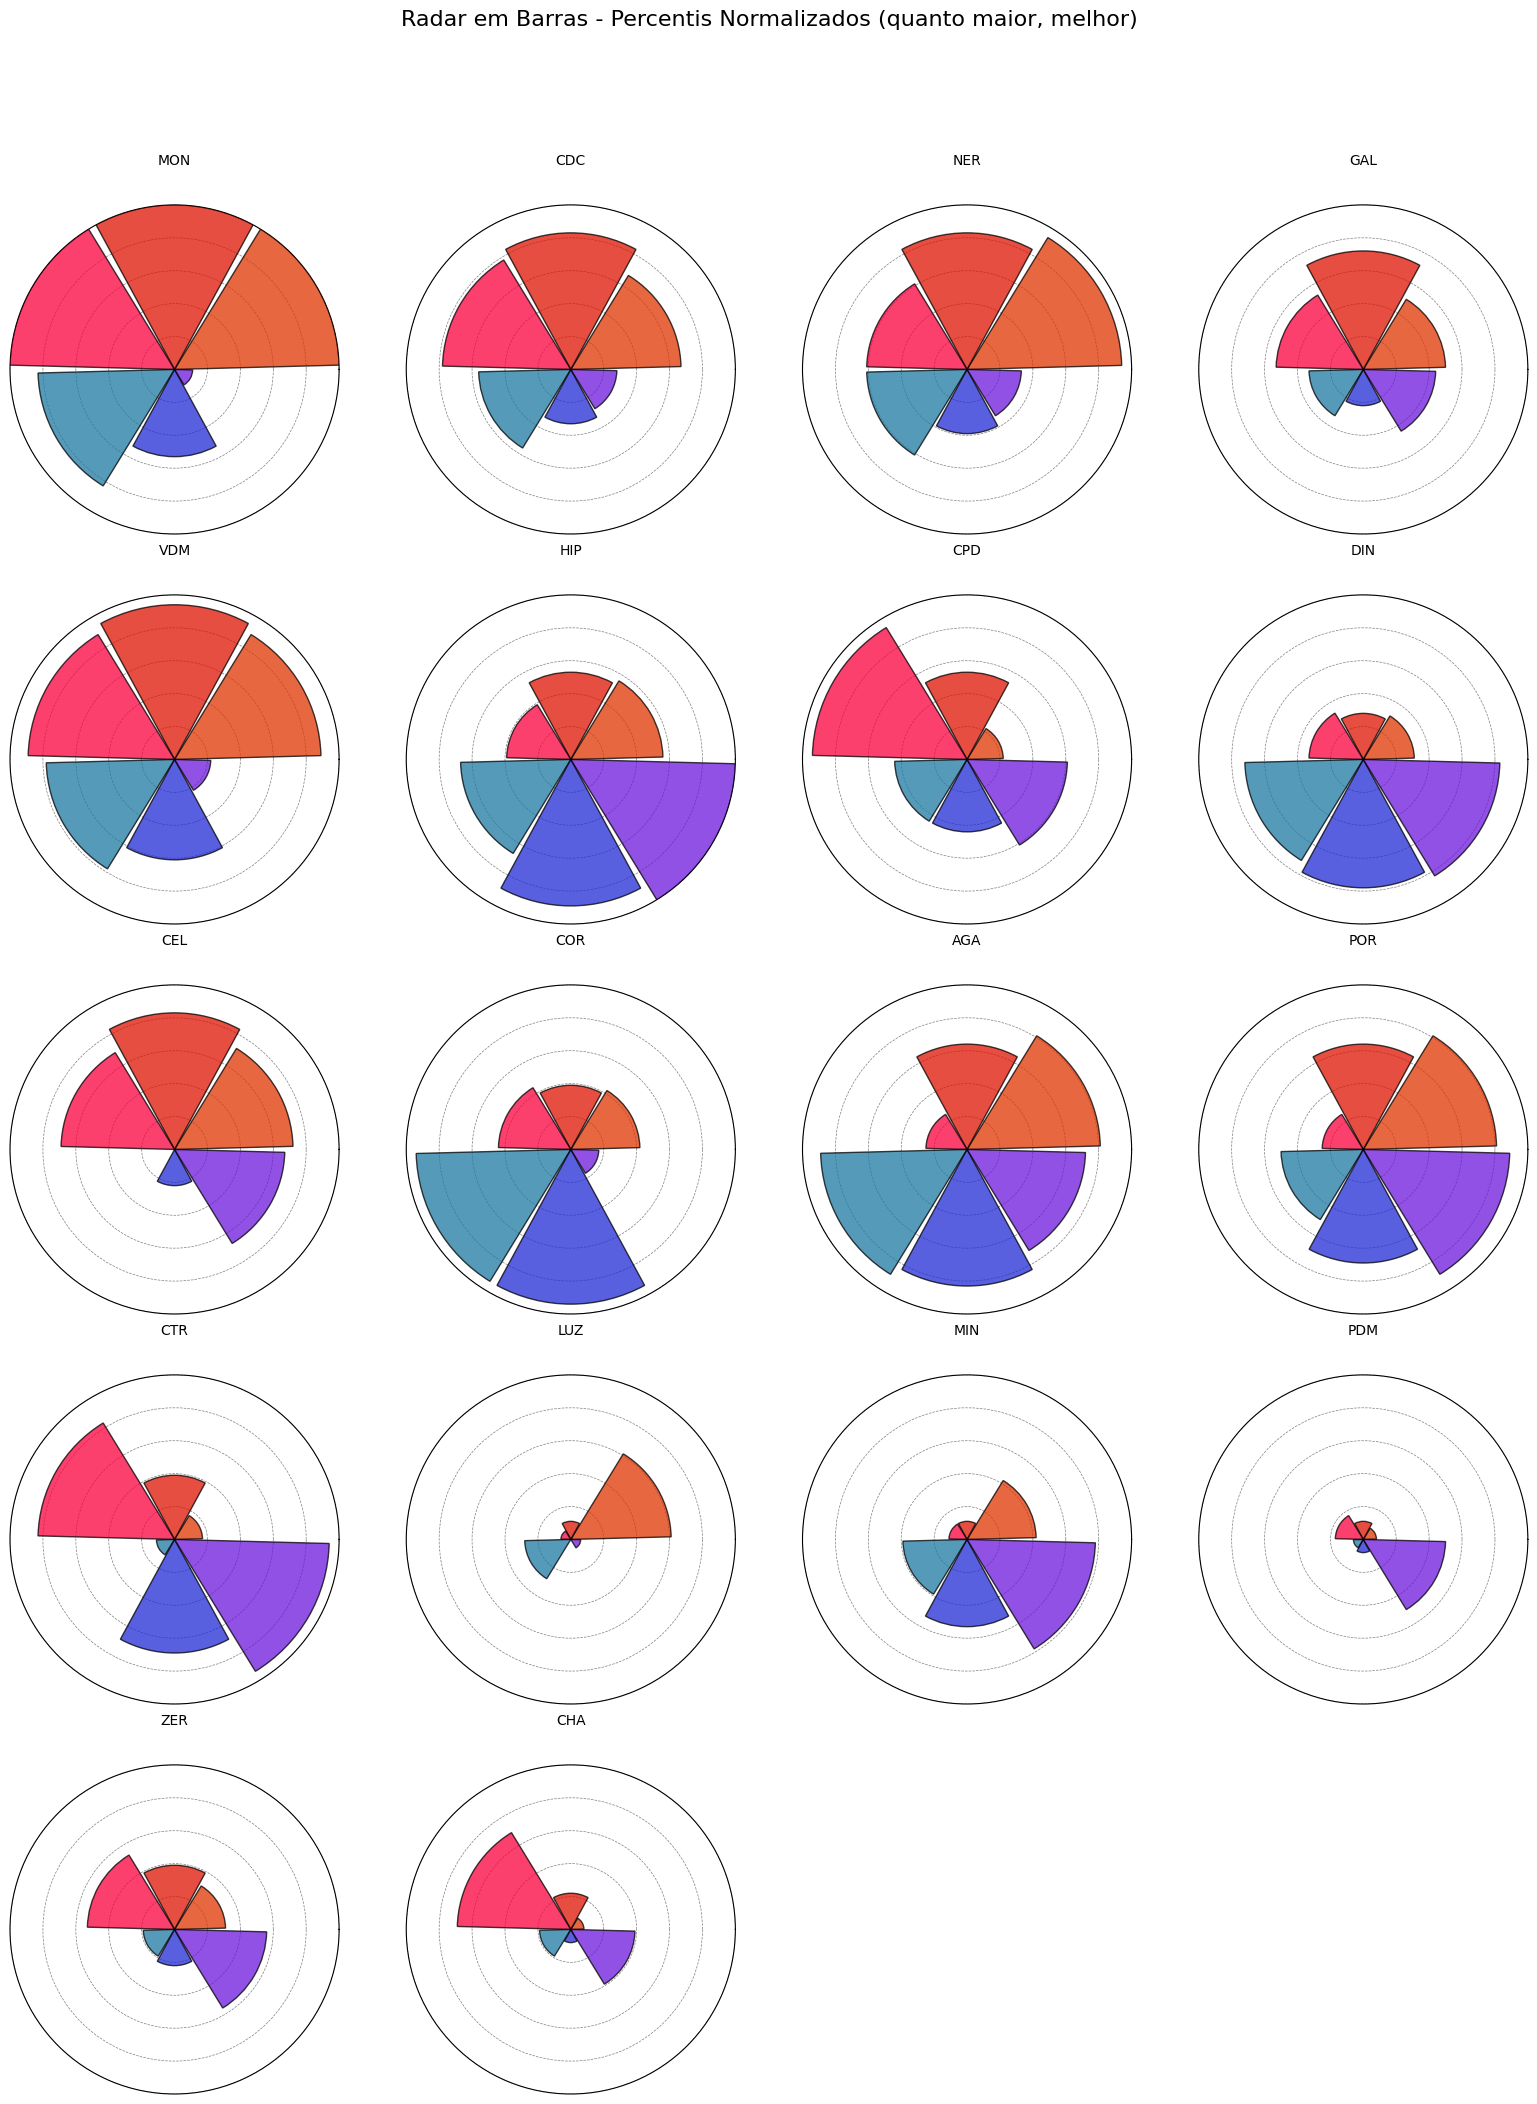

In [35]:
estatisticas = ['Ch/J', 'G/J', 'G/Ch %',
                'Ch. S/J', 'GS/J', 'Def %']

# Cores por métrica
cores_por_metrica = {
    'Def %': '#6C17DB',         # Amarelo
    'Ch. S/J': '#1E79A3',      # Verde
    'GS/J': '#212BD6',        # Ciano
    'G/J': '#DD1200',        # Vermelho
    'Ch/J': '#E03400',      # Magenta
    'G/Ch %': '#FA003C'      # Azul
}

# Parâmetros da figura
num_times = len(df_percentil)
num_colunas = 4
num_linhas = int(np.ceil(num_times / num_colunas))

# Ângulos igualmente espaçados
num_vars = len(estatisticas)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

# Rotacionar para que "G/J" fique no topo (90°)
idx_gols_mj = estatisticas.index('G/J')
angle_atual = angles[idx_gols_mj]
angle_desejado = np.pi / 2   # 90 graus
deslocamento = angle_desejado - angle_atual
angles = angles + deslocamento

# Criar subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(num_colunas * 4, num_linhas * 4),
                        subplot_kw=dict(polar=True))
axs = axs.flatten()

# Plotar cada time
for i in range(num_times):
    time_nome = df_percentil.iloc[i]['Time']
    valores = df_percentil.iloc[i][estatisticas].values

    # Cores baseadas na ordem das estatísticas
    cores_barras = [cores_por_metrica[col] for col in estatisticas]

    ax = axs[i]
    ax.set_axisbelow(True)  # Grade fica por baixo
    bars = ax.bar(angles, valores, width=2 * np.pi / num_vars * 0.95,
                  color=cores_barras, alpha=0.75, edgecolor='black', zorder=3)

    ax.set_xticks([])  # Remove os rótulos padrão
    ax.set_yticklabels([])
    ax.set_ylim(0, 1)
    ax.set_title(time_nome, size=10, y=1.10)
    ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Remover subplots vazios
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Radar em Barras - Percentis Normalizados (quanto maior, melhor)", fontsize=16, y=1.05)
plt.tight_layout()

# Salvar como PNG
plt.savefig("radar_barras_percentis.png", dpi=300, bbox_inches='tight')
plt.show()


In [36]:
cols = ['Time', 'J', 'G', 'G/J', 'Ch/J', 'G/Ch %',
                'GS', 'GS/J', 'Ch. S/J', 'Def %', 'Def/J', 'AP%']
df_notas = df_percentil[cols]
# df_notas['Def/J'] = df_notas['Def/J'].rank(pct=True)
df_notas['Nota_Gol'] = round(100 * (df_notas['GS/J']*0.3 + df_notas['Def/J']*0.2 + df_notas['Def %']*0.5), 1)
df_notas['Nota_Zag'] = round(100 * (df_notas['Ch. S/J']*0.7 + df_notas['GS/J']*0.3), 1)
df_notas['Nota_Def'] = round((df_notas['GS/J']*100*0.5 + df_notas['Nota_Gol']*0.2 + df_notas['Nota_Zag']*0.2 + df_notas['GS']*100*0.1), 1)
df_notas['Nota_Ata'] = round(100 * (df_notas['G/J']*0.4 + df_notas['Ch/J']*0.3 + df_notas['G/Ch %']*0.2 + df_notas['G']*0.1), 1)
df_notas['Nota_Tot'] = round(df_notas['Nota_Ata']*0.5 + df_notas['Nota_Def']*0.5, 1)
df_notas = df_notas.sort_values(by=['J', 'Nota_Tot'], ascending=False).reset_index(drop=True)
df_notas.index += 1
df_notas

,Time,J,G,G/J,Ch/J,G/Ch %,GS,GS/J,Ch. S/J,Def %,Def/J,AP%,Nota_Gol,Nota_Zag,Nota_Def,Nota_Ata,Nota_Tot
1,MON,6,1.00,1.00,1.00,1.00,0.19,0.53,0.83,0.11,0.11,83.0,23.6,74.0,47.9,100.0,74.0
2,CDC,6,0.94,0.83,0.67,0.78,0.00,0.33,0.56,0.28,0.44,50.0,32.7,49.1,32.9,78.3,55.6
3,NER,5,0.86,0.83,0.94,0.61,0.19,0.39,0.61,0.33,0.28,67.0,33.8,54.4,39.0,82.2,60.6
4,GAL,5,0.78,0.72,0.50,0.53,0.06,0.22,0.33,0.44,0.50,27.0,38.6,29.7,25.3,62.2,43.8
5,VDM,4,0.86,0.94,0.89,0.89,0.56,0.61,0.78,0.22,0.17,75.0,32.7,72.9,57.2,90.7,74.0
6,HIP,4,0.64,0.53,0.56,0.39,0.86,0.89,0.67,1.00,0.58,50.0,88.3,73.6,85.5,52.2,68.8
7,DIN,4,0.36,0.28,0.31,0.33,0.72,0.78,0.72,0.83,0.33,33.0,71.5,73.8,75.3,30.7,53.0
8,CPD,4,0.64,0.53,0.22,0.94,0.44,0.44,0.44,0.61,0.58,33.0,55.3,44.0,46.3,53.0,49.6
9,AGA,3,0.53,0.64,0.81,0.25,0.86,0.83,0.89,0.72,0.22,44.0,65.3,87.2,80.6,60.2,70.4
10,POR,3,0.53,0.64,0.81,0.25,0.72,0.69,0.50,0.89,0.78,44.0,80.8,55.7,69.0,60.2,64.6


Explicar o porque do uso do gráfico radar (radial bar chart)

In [37]:
# Inicializa a coluna 'Fase' com valor padrão
df_notas['Fase'] = 'Desconhecida'

# Jogo da Morte: 3 jogos + times específicos
df_notas.loc[(df_notas['J'] == 3) & (df_notas['Time'].isin(['POR', 'PDM'])), 'Fase'] = 'Morte'

# Oitavas: 3 jogos, mas excluindo POR e PDM
df_notas.loc[(df_notas['J'] == 3) & (~df_notas['Time'].isin(['POR', 'PDM'])), 'Fase'] = 'Oitavas'

# Quartas de Final: 4 jogos
df_notas.loc[df_notas['J'] == 4, 'Fase'] = 'Quartas'

# Semifinal: 5 jogos
df_notas.loc[df_notas['J'] == 5, 'Fase'] = 'Semis'

# Final: 6 jogos
df_notas.loc[df_notas['J'] == 6, 'Fase'] = 'Final'

In [38]:
pesos_fase = {
    'Morte': 0.80,
    'Oitavas': 1.00,
    'Quartas': 1.10,
    'Semis': 1.2,
    'Final': 1.3
}

In [39]:
df_notas['Peso_Fase'] = df_notas['Fase'].map(pesos_fase)
df_notas['Nota_Tot_Pon'] = round(df_notas['Nota_Tot'] * df_notas['Peso_Fase'], 1)
df_notas = df_notas.sort_values(by=['Time', 'Nota_Tot_Pon'], ascending=True).reset_index(drop=True)
df_notas.index += 1
df_notas

,Time,J,G,G/J,Ch/J,G/Ch %,GS,GS/J,Ch. S/J,Def %,Def/J,AP%,Nota_Gol,Nota_Zag,Nota_Def,Nota_Ata,Nota_Tot,Fase,Peso_Fase,Nota_Tot_Pon
1,AGA,3,0.53,0.64,0.81,0.25,0.86,0.83,0.89,0.72,0.22,44.0,65.3,87.2,80.6,60.2,70.4,Oitavas,1.0,70.4
2,CDC,6,0.94,0.83,0.67,0.78,0.00,0.33,0.56,0.28,0.44,50.0,32.7,49.1,32.9,78.3,55.6,Final,1.3,72.3
3,CEL,3,0.72,0.83,0.72,0.69,0.44,0.22,0.00,0.67,0.94,67.0,58.9,6.6,28.5,75.8,52.2,Oitavas,1.0,52.2
4,CHA,3,0.22,0.22,0.08,0.69,0.31,0.08,0.19,0.39,0.67,0.0,35.3,15.7,17.3,27.2,22.2,Oitavas,1.0,22.2
5,COR,3,0.36,0.39,0.42,0.44,0.94,0.94,0.94,0.17,0.06,56.0,37.9,94.0,82.8,40.6,61.7,Oitavas,1.0,61.7
6,CPD,4,0.64,0.53,0.22,0.94,0.44,0.44,0.44,0.61,0.58,33.0,55.3,44.0,46.3,53.0,49.6,Quartas,1.1,54.6
7,CTR,3,0.36,0.39,0.17,0.83,0.72,0.69,0.11,0.94,1.00,33.0,87.7,28.4,64.9,40.9,52.9,Oitavas,1.0,52.9
8,DIN,4,0.36,0.28,0.31,0.33,0.72,0.78,0.72,0.83,0.33,33.0,71.5,73.8,75.3,30.7,53.0,Quartas,1.1,58.3
9,GAL,5,0.78,0.72,0.50,0.53,0.06,0.22,0.33,0.44,0.50,27.0,38.6,29.7,25.3,62.2,43.8,Semis,1.2,52.6
10,HIP,4,0.64,0.53,0.56,0.39,0.86,0.89,0.67,1.00,0.58,50.0,88.3,73.6,85.5,52.2,68.8,Quartas,1.1,75.7


In [40]:
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 1 to 18
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          18 non-null     object 
 1   J             18 non-null     int64  
 2   G             18 non-null     float64
 3   G/J           18 non-null     float64
 4   Ch/J          18 non-null     float64
 5   G/Ch %        18 non-null     float64
 6   GS            18 non-null     float64
 7   GS/J          18 non-null     float64
 8   Ch. S/J       18 non-null     float64
 9   Def %         18 non-null     float64
 10  Def/J         18 non-null     float64
 11  AP%           18 non-null     float64
 12  Nota_Gol      18 non-null     float64
 13  Nota_Zag      18 non-null     float64
 14  Nota_Def      18 non-null     float64
 15  Nota_Ata      18 non-null     float64
 16  Nota_Tot      18 non-null     float64
 17  Fase          18 non-null     object 
 18  Peso_Fase     18 non-null     fl